In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

# for aesthetic plots
def science_plot(fontsize=9, scistyle=True, show_latex=True):
    # Default settings (applied to both 2D and 3D)
    if scistyle:
        import scienceplots
        plt.style.use(['science','grid','notebook'])
    if show_latex:
        plt.rcParams.update({
            # Latex Use
            'text.usetex'     : True,        # Use LaTeX for text rendering
            'font.family'     : 'serif',     # Set font family to serif
        })

    plt.rcParams.update({
        # Fontsizes
        'font.size'       : fontsize,    # General font size
        'axes.titlesize'  : fontsize,    # Font size of the axes title
        'axes.labelsize'  : fontsize,    # Font size of the axes labels
        'xtick.labelsize' : fontsize,    # Font size of the x-axis tick labels
        'ytick.labelsize' : fontsize,    # Font size of the y-axis tick labels
        'legend.fontsize' : fontsize,    # Font size of the legend
        'figure.titlesize': fontsize,    # Font size of the figure title

        # Legend
        'legend.fancybox' : False,       # Disable the fancy box for legend
        'legend.edgecolor': 'k',         # Set legend border color to black
    })

    def optional():
        # # Grid settings
        # "grid.linestyle": "--",
        # "grid.color": "gray",
        # "grid.linewidth": 1,
        # "axes.grid": True,

        # # Minor grid (default, but may be overridden for 3D)
        # "xtick.minor.visible": True,
        # "ytick.minor.visible": True,

        # # Tick settings (both major & minor)
        # "xtick.direction": "in",
        # "ytick.direction": "in",
        # "xtick.top": True,
        # "xtick.bottom": True,
        # "ytick.left": True,
        # "ytick.right": True,

        # 'colorbar.ticks.direction': 'out',

        # # Major ticks
        # "xtick.major.width": 1,
        # "ytick.major.width": 1,
        # "xtick.major.size": 5,
        # "ytick.major.size": 5,

        # # Minor ticks
        # "xtick.minor.width": 1,
        # "ytick.minor.width": 1,
        # "xtick.minor.size": 2.5,
        # "ytick.minor.size": 2.5,

        # # Spine (border) width
        # "axes.linewidth": 1
        pass 

science_plot(fontsize=9)

In [228]:
def percent_error(expected, observed, percent = True):
    result = np.abs(expected - observed) / expected
    if percent:
        result *= 100 
    return result

df = pd.read_csv("optical_data.csv", sep="\t")
df_p = df['object distance (cm)']
df_q = df['image distance (cm)']
df_f_obs = 10 / (1/df_p + 1/df_q) 
df_f_exp = df['focal length (mm)']
df_epsilon = percent_error(df_f_exp,df_f_obs)
df_f= pd.DataFrame({
    'p (cm)':df_p,
    'q (cm)':df_q,
    'f_obs (mm)':df_f_obs,
    'f_exp (mm)':df_f_exp,
    'eps (%)': np.round(df_epsilon,2)
})
print(df_f.sort_values('f_exp (mm)'))


df_ho = df['object size (cm)']
df_hi  = df['image size (cm)']
df_m_obs = df_q / df_p
df_m_exp = df_hi / df_ho
df_eps = percent_error(df_m_exp,df_m_obs)
df_m = pd.DataFrame({
    'p (cm)':df_p,
    'q (cm)':df_q,
    'f_exp (mm)':df_f_exp,
    'ho (cm)': df_ho,
    'hi (cm)': df_hi,
    'm_obs': df_m_obs,
    'm_exp': df_m_exp,
    'eps (%)': np.round(df_eps,2)
}).dropna()
print(df_m.sort_values('f_exp (mm)'))
df_m_obs = df_m["m_obs"]
df_m_exp = df_m["m_exp"]

    p (cm)  q (cm)  f_obs (mm)  f_exp (mm)  eps (%)
0   132.15    1.85   18.244590          18     1.36
1   132.30    1.70   16.784328          18     6.75
2    68.30    1.70   16.587143          18     7.85
3   129.60    4.40   42.555224          48    11.34
4    64.70    5.30   48.987143          48     2.06
5    55.00    5.00   45.833333          48     4.51
6    44.30    5.70   50.502000          48     5.21
27   58.70   11.30   94.758571         100     5.24
28   69.00   11.00   94.875000         100     5.12
11   59.00   11.00   92.714286         100     7.29
8    60.00   11.80   98.607242         100     1.39
9    48.30   11.70   94.185000         100     5.81
26   48.40   11.60   93.573333         100     6.43
7   124.00   10.00   92.537313         100     7.46
10   48.60   11.40   92.340000         100     7.66
25   37.60   12.40   93.248000         100     6.75
33   43.40   16.60  120.073333         127     5.45
32   28.60   21.40  122.408000         127     3.62
35   64.40  

In [232]:
import pandas as pd
import numpy as np

def percent_error(expected, observed, percent=True):
    result = np.abs(expected - observed) / expected
    if percent:
        result *= 100 
    return result

df = pd.read_csv("optical_data.csv", sep="\t")

# -----------------------
# FOCAL LENGTH ANALYSIS
# -----------------------
df_p = df['object distance (cm)']
df_q = df['image distance (cm)']
df_f_obs = 10 / (1/df_p + 1/df_q) 
df_f_exp = df['focal length (mm)']
df_epsilon = percent_error(df_f_exp, df_f_obs)

df_f = pd.DataFrame({
    'f_obs (mm)': np.round(df_f_obs, 2),
    'f_exp (mm)': np.round(df_f_exp,2),
    'p (cm)': np.round(df_p,2),
    'q (cm)': np.round(df_q,2),
    'eps (%)': np.round(df_epsilon, 2)
})

# print("Raw focal length data")
# print(df_f.sort_values('f_exp (mm)'))

# Average by focal length
df_f_avg = df_f.groupby("f_exp (mm)").mean(numeric_only=True).reset_index()
print("\nAveraged focal length data")
print(df_f_avg)


# -----------------------
# MAGNIFICATION ANALYSIS
# -----------------------
df_ho = df['object size (cm)']
df_hi = df['image size (cm)']
df_m_obs = df_q / df_p
df_m_exp = df_hi / df_ho
df_eps = percent_error(df_m_exp, df_m_obs)

df_m = pd.DataFrame({
    'p (cm)': np.round(df_p,2),
    'q (cm)':np.round( df_q,2),
    'f_exp (mm)': np.round(df_f_exp,2),
    'ho (cm)': np.round(df_ho,2),
    'hi (cm)': np.round(df_hi,2),
    'm_obs': np.round(df_m_obs,2),
    'm_exp': np.round(df_m_exp,2),
    'eps (%)': np.round(df_eps, 2)
}).dropna()

# print("\nRaw magnification data")
# print(df_m.sort_values('f_exp (mm)'))

# Average by focal length
df_m_avg = df_m.groupby("f_exp (mm)").mean(numeric_only=True).reset_index()
print("\nAveraged magnification data")
print(df_m_avg)


# For later use
df_m_obs = df_m["m_obs"]
df_m_exp = df_m["m_exp"]



Averaged focal length data
   f_exp (mm)  f_obs (mm)      p (cm)     q (cm)   eps (%)
0          18   17.203333  110.916667   1.750000  5.320000
1          48   46.970000   73.400000   5.100000  5.780000
2         100   94.093333   61.511111  11.355556  5.905556
3         127  121.857500   54.375000  17.000000  4.050000
4         200  199.778333   59.166667  34.833333  0.631667
5         250  241.306667   73.633333  37.700000  3.476667
6         252  227.893333   73.066667  34.933333  9.566667

Averaged magnification data
   f_exp (mm)   p (cm)  q (cm)  ho (cm)  hi (cm)  m_obs  m_exp  eps (%)
0          18  132.225   1.775  110.000     1.65  0.010  0.015   10.540
1          48  129.600   4.400  110.000     3.40  0.030  0.030    9.840
2         100   67.540  11.260   27.520     3.27  0.200  0.202    4.402
3         127   62.060  16.740   27.520     4.46  0.358  0.362    6.612
4         200   70.000  31.000   32.675     8.35  0.545  0.530    9.795
5         250  102.500  31.500  110.000

In [206]:
import numpy as np
from scipy.stats import norm, chisquare

print("-" * 100)

# f-test
obs = np.array(df_f["f_obs"])
exp = np.array(df_f["f_exp"])
# Scale expected so totals match
exp = exp * (obs.sum() / exp.sum())
chi2, p = chisquare(f_obs=obs, f_exp=exp)
df = len(obs) - 1   # degrees of freedom
sigma = norm.isf(p / 2)  # equivalent sigma (two-sided)

print("f Chi-square statistic:", chi2)
print("f df:", df)
print("f p-value:", p)
print("f eq sigma (2-sided):", sigma)

print("-" * 100)

# M-test
obs = np.array(df_m["m_obs"])
exp = np.array(df_m["m_exp"])
# Scale expected so totals match
exp = exp * (obs.sum() / exp.sum())
chi2, p = chisquare(f_obs=obs, f_exp=exp)
df = len(obs) - 1   # degrees of freedom
sigma = norm.isf(p / 2)

print("M Chi-square statistic:", chi2)
print("M df:", df)
print("M p-value:", p)
print("M eq sigma (2-sided):", sigma)

print("-" * 100)


----------------------------------------------------------------------------------------------------
f Chi-square statistic: 7.009500016924128
f df: 35
f p-value: 0.9999999160973827
f eq sigma (2-sided): 1.0515633641772239e-07
----------------------------------------------------------------------------------------------------
M Chi-square statistic: 0.0492664304667774
M df: 18
M p-value: 1.0
M eq sigma (2-sided): 0.0
----------------------------------------------------------------------------------------------------


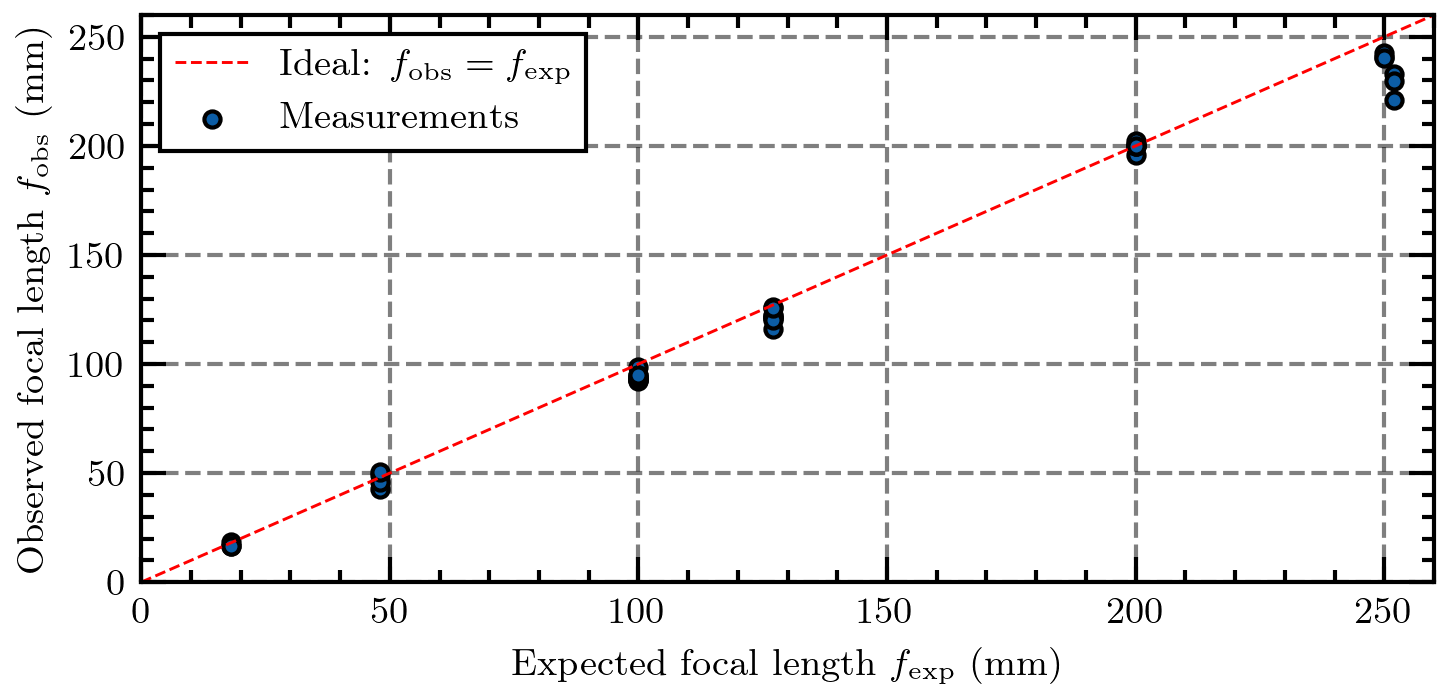

In [78]:
plt.figure(figsize=(5,2.5), dpi=300)

x = np.linspace(0,260,100)
plt.plot(x, x, color='r', linewidth=0.7, linestyle='--', label=r"Ideal: $f_\text{obs}=f_\text{exp}$")

plt.scatter(df_f['f_exp'], df_f['f_obs'], 
            s=15, edgecolor='k', label="Measurements")

plt.xlabel(r'Expected focal length $f_{\text{exp}}$ (mm)')
plt.ylabel(r'Observed focal length $f_{\text{obs}}$ (mm)')
#plt.title("Observed vs. Expected Focal Lengths")
plt.xlim(0,260)
plt.ylim(0,260)

plt.legend(loc="upper left", fontsize=9)
plt.tight_layout()
plt.show()


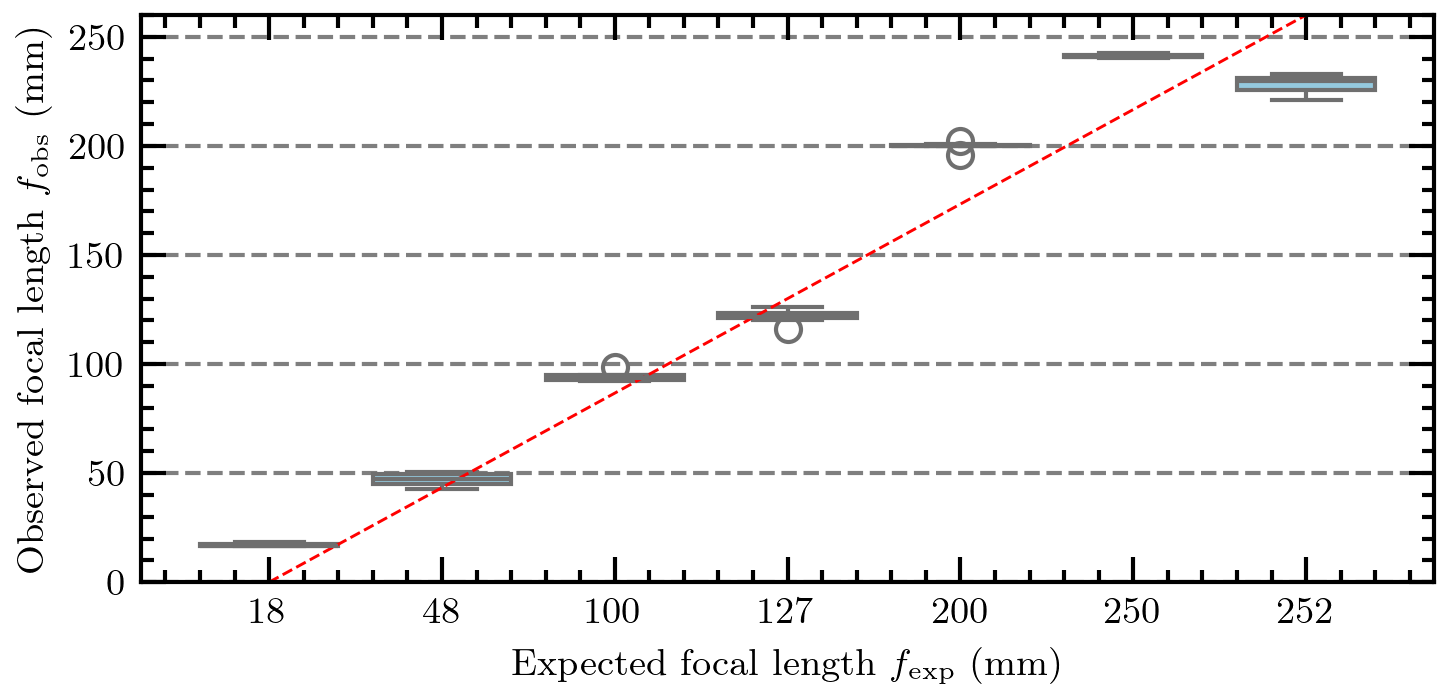

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,2.5), dpi=300)

# boxplot: f_exp on x-axis, f_obs on y-axis
sns.boxplot(x='f_exp', y='f_obs', data=df_f, color='skyblue')

plt.plot([0, len(df_f['f_exp'].unique())-1], [0, 260], color='r', linestyle='--', linewidth=0.7)  # y=x line
plt.xlabel(r'Expected focal length $f_\text{exp}$ (mm)')
plt.ylabel(r'Observed focal length $f_\text{obs}$ (mm)')
# plt.title('Observed vs. Expected Focal Lengths (Median + Spread)')
plt.ylim(0, 260)
plt.tight_layout()
plt.show()

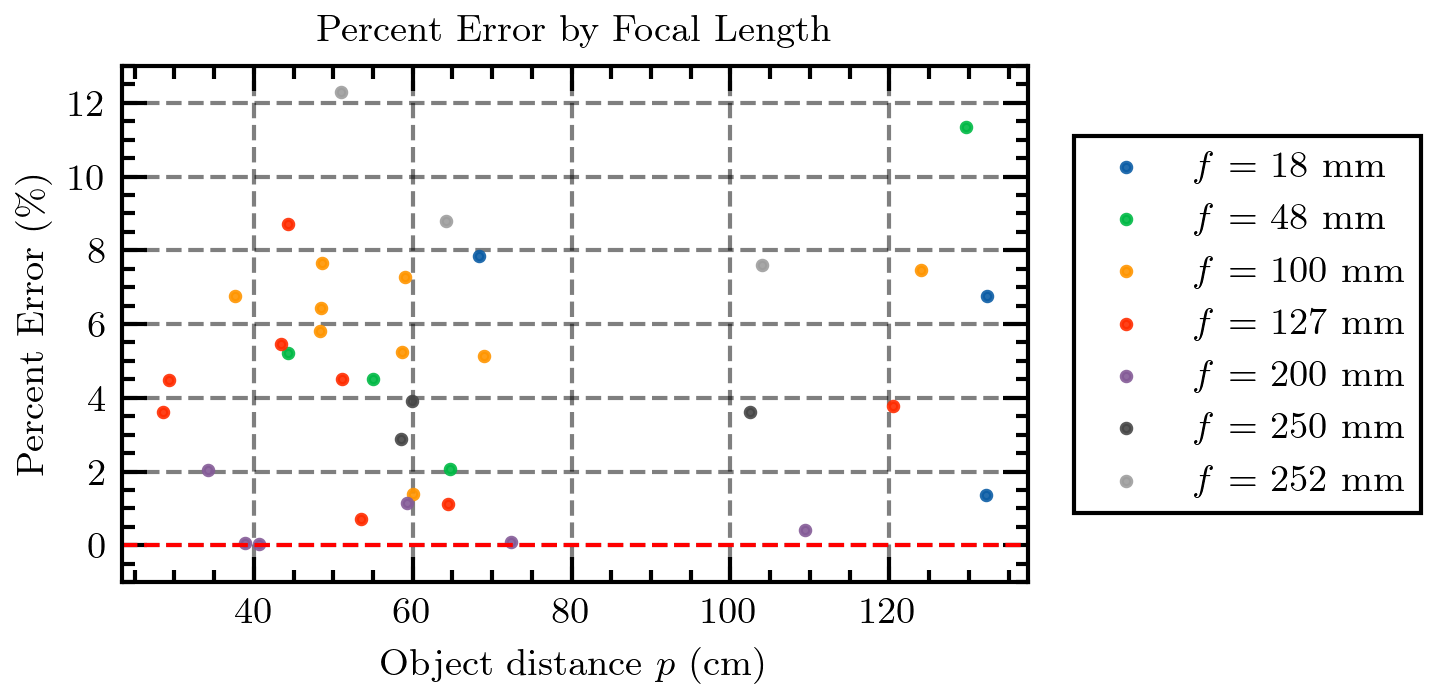

In [205]:
plt.figure(figsize=(5,2.5), dpi=300)

for f_val, group in df_f.groupby("f_exp"):
    plt.scatter(group["p"], group["eps"], label=f"$f$ = {f_val} mm", alpha=0.9, s = 5)

plt.axhline(0, color="red", linestyle="--",linewidth = 1)
plt.ylim(-1,13)
plt.yticks(np.arange(0,14,2))
plt.xlabel("Object distance $p$ (cm)")
plt.ylabel(r"Percent Error (\%)")
plt.title("Percent Error by Focal Length")

# put legend outside, right side
plt.legend(bbox_to_anchor=(1.05, 0.5), loc="center left", borderaxespad=0.)
plt.tight_layout()

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot

def rotation_matrix(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta),  np.cos(theta)]
    ])
def biconvex_lens(center=[0,0], thickness=1, diameter=4, radius=10, symmetric = True,
                    R1 = 10, R2 = 10,
                  rotation=0, side_count=200, deg=True, priority = 'thickess'):
    if priority == 'thickess':
        min_radius = (thickness**2+diameter**2)/(4*thickness)
        if radius < min_radius:
            print(f"Given radius is lower than the minimum for this lens diameter nd thickness ({min_radius}). adjusting")
            radius = min_radius
    if priority == "radius":
        min_thickness = 2*(radius - np.sqrt(radius**2 - (diameter/2)**2))
        if thickness < min_thickness:
            print(f"Given thickness is lower than the minimum for this lens diameter and radius({min_thickness}). adjusting")
            thickness = min_thickness
    theta0 = np.arcsin(diameter/2 / radius)
    theta = np.linspace(-theta0,theta0,side_count)
    if symmetric:
        R1 = R2 = radius
    cx1 = -R1*np.cos(theta) + (radius-thickness/2)
    cy1 =  R1*np.sin(theta) 
    cx2 =  R2*np.cos(theta) - (radius-thickness/2)
    cy2 =  R2*np.sin(theta) 
    cx = np.append(np.concatenate([cx1, cx2[::-1]]), cx1[0])
    cy = np.append(np.concatenate([cy1, cy2[::-1]]), cy1[0])
    if deg:
        rotation = np.deg2rad(rotation)
    lens = rotation_matrix(rotation) @ np.array([cx,cy])
    lens = lens + np.array(center).reshape(2,1)
    return lens.T

arrow = np.array([
    [0,0],
    [0.5,0],
    [0.5,2],
    [0.75,2],
    [0.25,3],
    [-0.25,2],
    [0,2],
    [0,0]
])

import matplotlib.pyplot as plt

plt.figure(figsize=(5,3), dpi= 300)

# Adjust arrow
arrow = (1/1.5)*np.array([ [0,0], [0.5,0], [0.5,2], [0.75,2], [0.25,3], [-0.25,2], [0,2], [0,0] ]) + [-0.25, -1]
scale_x, scale_y = 1, 1
dx, dy = 0, 0
object_arrow = arrow * [scale_x, scale_y] + [dx, dy]

f = 10
p = 10
lens = biconvex_lens(center = [p,0], rotation=0, symmetric=True, thickness = 1, radius = 7.5).T
xmax = 50
arr_height = scale_y


plt.grid()
plt.plot(lens[0],lens[1], color = 'k', linewidth = 1)
plt.plot(object_arrow.T[0], object_arrow.T[1], color = 'k',linewidth = 1)

#plt.fill(adjusted_arrow[:,0], adjusted_arrow[:,1], color='skyblue', edgecolor='k')

plt.plot([p,p],[-2,2],linewidth = 0.5,linestyle='--', color = 'k')  # lens midline
plt.plot([0,xmax],[0,0],linewidth = 0.5, linestyle = '--', color = 'k') # image midline

plt.plot([0,p],[arr_height,arr_height],linewidth = 0.5, linestyle = '--', color = 'k')
plt.plot([0,p],[-arr_height,-arr_height],linewidth = 0.5, linestyle = '--', color = 'k')

plt.plot([0,p],[arr_height,0],linewidth = 0.5, linestyle = '--', color = 'k')
plt.plot([0,p],[-arr_height,0],linewidth = 0.5, linestyle = '--', color = 'k')

plt.plot([p,xmax],[0,(arr_height/p)*(xmax)-arr_height],linewidth = 0.5, linestyle = '--', color = 'k')
plt.plot([p,xmax],[0,-(arr_height/p)*(xmax)+arr_height],linewidth = 0.5, linestyle = '--', color = 'k')

plt.plot([p,xmax],[arr_height,arr_height-(arr_height/f)*(xmax-p)],linewidth = 0.5, linestyle = '--', color = 'k')
plt.plot([p,xmax],[-arr_height,-arr_height+(arr_height/f)*(xmax-p)],linewidth = 0.5, linestyle = '--', color = 'k')

if (p-f) > 0:
    scale2  =  arr_height * f / (p-f)
else:
    print('no image formed')
    scale2 = 0

x_image = p**2 / (p-f)
image_arrow = arrow*[scale2,-scale2]+[x_image,0]
plt.plot(image_arrow.T[0], image_arrow.T[1], color = 'k',linewidth = 1)

## Annotatioions
y_annot = -2.3
line_height = 0.2
plt.plot([0,x_image],[y_annot,y_annot],linewidth = 0.75, color = 'k')
plt.plot([p,p+f],[y_annot-0.4,y_annot-0.4],linewidth = 0.75, color = 'k')
plt.plot([0,0],[y_annot-line_height,y_annot+line_height],linewidth = 0.75, color = 'k')
plt.plot([p,p],[y_annot-line_height,y_annot+line_height],linewidth = 0.75, color = 'k')
plt.plot([p,p],[y_annot-0.4-line_height,y_annot-0.4+line_height],linewidth = 0.75, color = 'k')
plt.plot([p+f,p+f],[y_annot-0.4-line_height,y_annot-0.4+line_height],linewidth = 0.75, color = 'k')
plt.plot([x_image,x_image],[y_annot-line_height,y_annot+line_height],linewidth = 0.75, color = 'k')

plt.annotate("$f$",(p+f/2,y_annot-1.1),fontsize=8)
plt.annotate("$p$",(p/2,y_annot+0.3),fontsize=8)
plt.annotate("$q$",(p+(x_image-p)/2,y_annot+0.3),fontsize=8)
plt.annotate("$h_o$",(-1.25,-0.25),fontsize=8)
plt.annotate("$h_i$",(x_image+0.5,0.1),fontsize=8)

plt.tight_layout()
plt.gca().set_aspect('equal')
plt.xlim(-1.5,xmax)
plt.ylim(-3.75,2.5)
plt.axis(False)
plt.show()

: 

In [2]:
import numpy as np
navi_debt =[
    49.50,
    20,
    20,
    43,
    100,
    14,
    11,
    100,
    20,
    20,
    10,
    32.5,
    79,
    11,
    11,
    79,
    16
]
sumt = np.sum(navi_debt)
print(sumt)

636.0


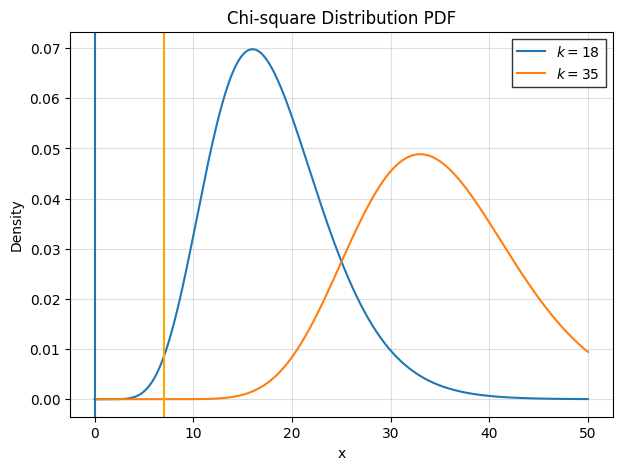

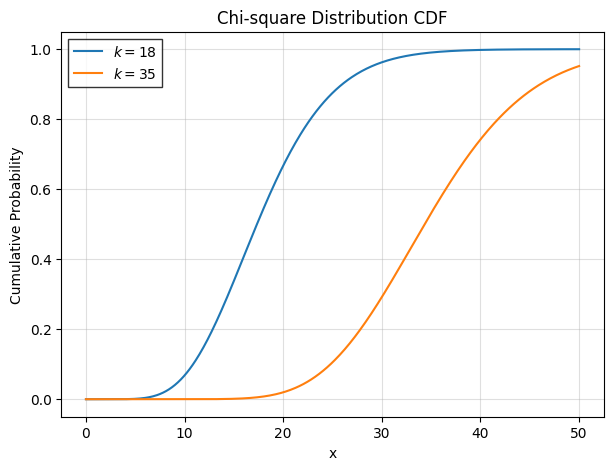

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Degrees of freedom
k_values = [18,35]

# x range
x = np.linspace(0, 50, 500)

# Plot PDF
plt.figure(figsize=(7, 5))
for k in k_values:
    pdf = chi2.pdf(x, k)
    plt.plot(x, pdf, label=fr'$k={k}$')
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Chi-square Distribution PDF")
plt.legend(fancybox=False, edgecolor='k')
plt.grid(alpha=0.4)
plt.axvline(7.01, color = 'orange')
plt.axvline(0.05)
plt.show()

# Plot CDF
plt.figure(figsize=(7, 5))
for k in k_values:
    cdf = chi2.cdf(x, k)
    plt.plot(x, cdf, label=fr'$k={k}$')
plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt.title("Chi-square Distribution CDF")
plt.legend(fancybox=False, edgecolor='k')
plt.grid(alpha=0.4)
plt.show()
